# 데이콘 이커머스 고객 데이터 분석

#### Customer_info data에 대한 기초 EDA 및 변수간 관계 분석입니다.

---


# 목차

1. import
2. read data
3. EDA 기초
    - 고객성별 파이차트
    - 고객지역 파이차트
    - 가입기간 히스토그램 및 박스플랏
4. EDA 데이터 관계 파악
    - 가입기간 중심으로
    - 고객성별과 고객지역

---

# 1. import 

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 한글깨짐해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 2. read data 

`-` 불러오기

In [12]:
df_customer= pd.read_csv('C:\\Users\\mimic\\mm\\dacon0210\\Customer_info.csv')

`-` 칼럼

In [17]:
df_customer.columns.values

array(['고객ID', '성별', '고객지역', '가입기간'], dtype=object)

`-` shape

In [18]:
df_customer.shape

(1468, 4)

`-` 결측치 확인

In [186]:
df_customer.isnull().sum(axis=0)

고객ID    0
성별      0
고객지역    0
가입기간    0
dtype: int64

`-` 데이터 shape 정보

- 고객 정보 데이터 
    - 칼럼은 총 4개
        - 고객 ID, 성별, 고객지역, 가입기간
    - 1468의 행으로 이루어짐
    - 결측치 없음
    
`-` 데이터 변수 정보

- 이산형 변수
    - 고객ID, 성별, 고객지역
- 연속형 변수
    - 가입기간
    
`-` 기타사항

- 고객ID 변수는 어떠한 정보를 담고 있긴 어려움, 따라서 일단은 활용 X

---

# EDA 기초

### 고객 성별 파이차트

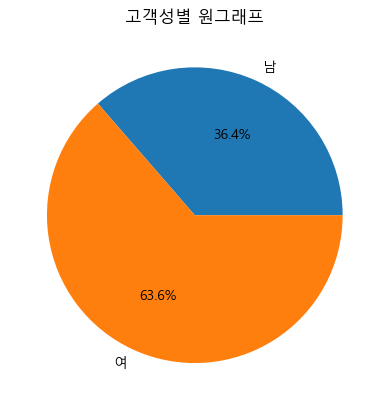

In [60]:
gender_count= df_customer.groupby('성별').count().iloc[:,0].values
gender_labels = df_customer.groupby('성별').count().index

plt.pie(gender_count,labels=gender_labels,autopct='%.1f%%');
plt.title("고객성별 원그래프")
plt.show()

- 고객의 성별 비율을 나타낸 원그래프
- 남성이 36.4%, 여성이 63.6%을 차지하고 있다
- 여성이 남성보다 약 2배가량 비율이 높은 것을 확인할 수 있음

---

### 고객 지역 원그래프

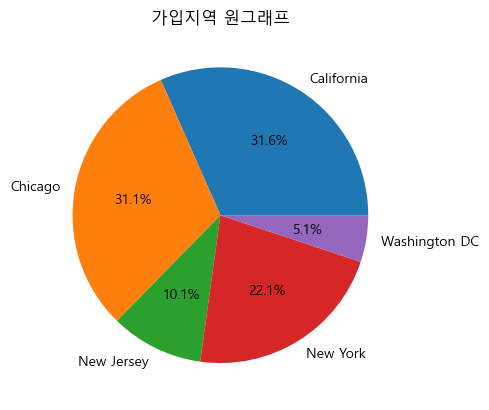

In [59]:
area_count= df_customer.groupby('고객지역').count().iloc[:,0].values
area_labels = df_customer.groupby('고객지역').count().index

plt.pie(gender_count,labels=area_labels,autopct='%.1f%%');
plt.title("가입지역 원그래프")
plt.show()

- 가입지역의 비율을 나타낸 원그래프
- 총 5개의 지역으로 나누어져 있다.
    - 캘리포니아 31.6%
    - 시카고 31.1%
    - 뉴욕 22.1%
    - 뉴저지 10.1%
    - 워싱턴 5.1%
- 단 이 비율의 차이가 이커머스 서비스의 지역 선호도라고 보기는 어렵다
- 각 지역의 총 인구 수에 비례하여 다른 플랫폼과의 얼마나 차이가 나는지 모르기 때문이다

---

### 가입기간 히스토그램

`-` 가입기간(단위:월) 통계량

- 월, 년 단위

In [110]:
mon , year =df_customer[['가입기간']].describe(),df_customer[['가입기간']].describe() /12

pd.concat([mon,year],axis=1).iloc[1:,:]

,가입기간,가입기간
mean,25.912125,2.159344
std,13.959667,1.163306
min,2.000000,0.166667
25%,14.000000,1.166667
50%,26.000000,2.166667
75%,38.000000,3.166667
max,50.000000,4.166667


- 평균은 약 26개월, 표준편차는 13개월
- 중위값 26개월, 최솟값 2개월, 최댓값 50개월
- 평균과 중위값의 차이가 크지 않음, 분포가 비교적 대칭적일 것

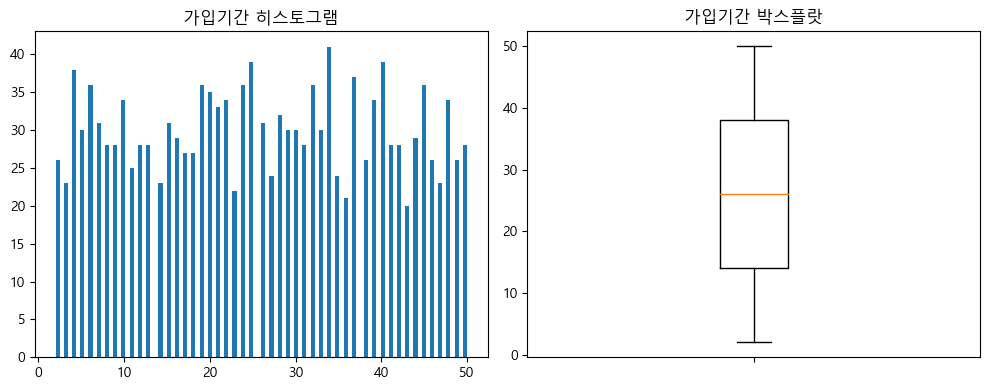

In [119]:
#term_conut = df_customer.groupby('가입기간').count().iloc[:,0].values

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1) 
plt.hist(df_customer[['가입기간']], bins=100);
plt.title("가입기간 히스토그램")
#plt.show()

plt.subplot(1, 2, 2) 
plt.boxplot(df_customer[['가입기간']],labels=' ');
plt.title("가입기간 박스플랏")

plt.tight_layout() 
plt.show()

- 히스토그램
    - 가입기간 구간이 특정 몇주차씩마다 몰려있는 분포 꼴을 확인
    - 어떤 다른 데이터와 연관이 있을 것으로 예상(예를들어 특정시기의 광고로 가입유저의 증가)
- 박스플랏
    - 특이사항 x
    - 이상치 x

---

# EDA Data간 관계 파악

- 해당 데이터는 3개의 이산형 변수와 1개의 연속형 변수로 이루어져 있다.
- 따라서 유일하게 연속형 변수인 가입기간을 중심으로 나머지 이산형 변수와 어떤 관계성 또는 특이성있는지 파악해보려한다.
- 성별과 가입지역의 관계성은 현재 대회에 필요한 큰 정보는 담고 있지 않을 것으로 예상되어 일단 고려 X

---

### 가입기간과 성별 박스플랏 및 통계량

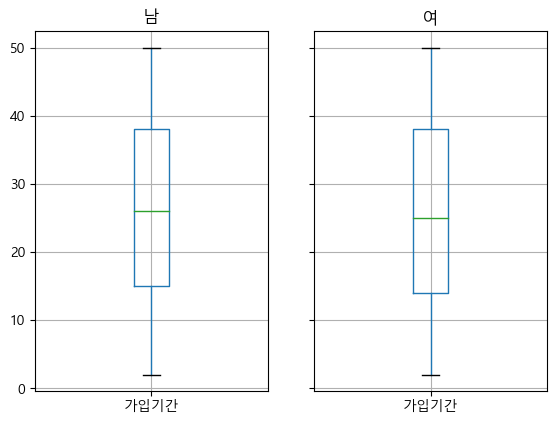

In [140]:
df_customer.groupby('성별').boxplot();

- 박스플랏 상으로 큰 유의점을 찾지 어렵다
- 따라서 분포의 큰 차이는 없을 것으로 보인다

In [142]:
df_customer.groupby('성별').describe()

가입기간                                                   
    count       mean        std  min   25%   50%   75%   max
성별                                                          
남   534.0  26.329588  13.743700  2.0  15.0  26.0  38.0  50.0
여   934.0  25.673448  14.083406  2.0  14.0  25.0  38.0  50.0

- 마찬가지로 남녀 비율의 차이가 있을 뿐이지 통계량에 유의한 차이점은 존재하기 어렵다
- 다만 여성이 남성보다 가입기간의 평균이 약소하게 낮으며, 표준편차가 좀더 크다
    - 남성보다 여성의 신규 고객이 더 활발히 들어 올 것임을 남녀 카운트의 차이와 평균의 차이로 해석할 수도 있겠다

---

### 가입기간과 고객지역 박스플랏 및 통계량

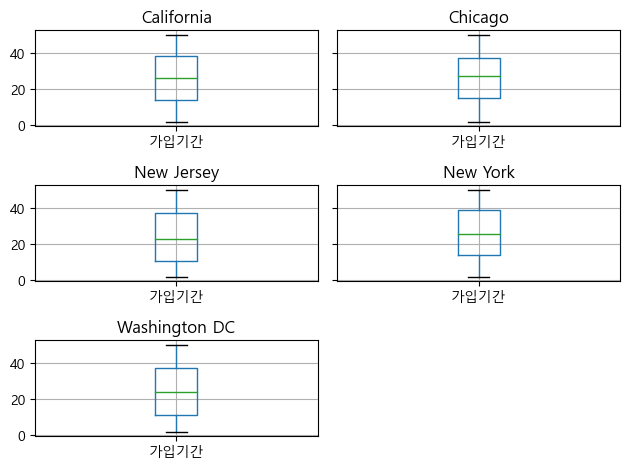

In [149]:
df_customer.groupby('고객지역').boxplot();
plt.tight_layout() 
plt.show()

- 지역마다 가입기간의 분포의 차이는 있어보이지 않는다
- 이상치 또한 있어보이지 않는다

In [151]:
df_customer.groupby('고객지역').describe()

가입기간                                                    
               count       mean        std  min   25%   50%    75%   max
고객지역                                                                    
California     464.0  26.122845  13.881790  2.0  14.0  26.0  38.00  50.0
Chicago        456.0  26.228070  13.550904  2.0  15.0  27.0  37.25  50.0
New Jersey     149.0  24.328859  14.847169  2.0  11.0  23.0  37.00  50.0
New York       324.0  26.070988  14.159788  2.0  14.0  25.5  39.00  50.0
Washington DC   75.0  25.146667  14.344877  2.0  11.5  24.0  37.00  50.0

- 통계량 또한 유의한 차이는 나타나지 않는다.
- 다만 뉴저지가 평균이 조금 떨어지긴 하나 표준편차를 보았을 때 같은 분포라고 보여질 것
    - <주의> 엄밀하게는 분포에 대한 검정은 해야한다

### 정리

- 성별과 고객지역을 각각 가입기간으로 관계를 파악해본 결과
- 이들은 서로 크리티컬한 영향을 주는 변수가 아닐 것으로 보여진다.
- 왜냐하면 성별과 고객지역으로 가입기간의 분포를 각각 보았을 때, 분포에 유의한 변화가 거의 없었기 때문이다.
- 따라서 성별과 고객지역은 고객가입기간에 있어 영향을 주는 요소로 보기 어렵다고 생각되어진다.
- <주의> 가입**기간**에 영향을 주지 않아 보인다는 것이지 고객의 **가입** 자체에는 충분히 관련이 있을 수 있다.

---

### 성별과 고객지역 바그래프 및 통계량

In [181]:
table = pd.pivot_table(df_customer[['성별','고객지역']],aggfunc=len,  index=['고객지역'], columns=['성별'])
table

성별,남,여
고객지역,,
California,165,299
Chicago,171,285
New Jersey,52,97
New York,111,213
Washington DC,35,40


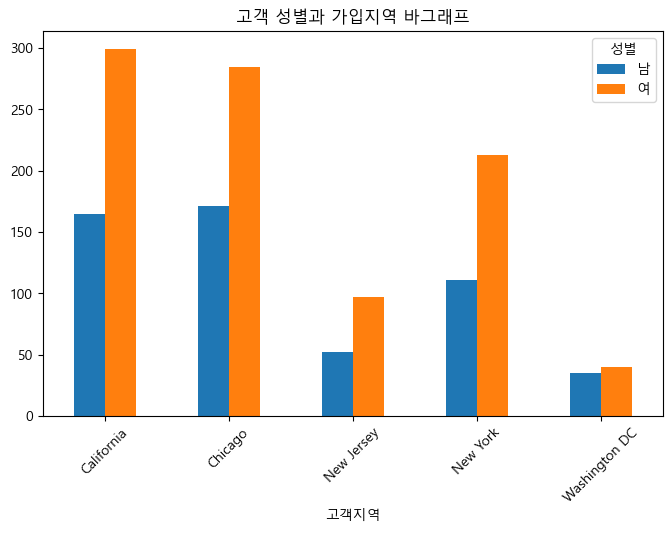

In [176]:
table.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.xticks(rotation=45)
plt.title('고객 성별과 가입지역 바그래프')
plt.show()

- 여성이 모든 지역에서 남성보다 고객의 수가 많다
- 단 유일하게 워싱턴DC 지역은 여성과 남성의 차이가 매우 작은 편이다

---